In [10]:
from platform import python_version

In [11]:
print(python_version())

3.9.12


In [12]:
import os
import numpy as np
import pandas as pd
import re

In [13]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shirinmandapati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier


In [16]:
from sklearn import metrics
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shirinmandapati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
news_dataset_train = pd.read_csv('Desktop/train.csv')

In [19]:
news_dataset_train

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


# Preprocessing the dataset


In [20]:
# shape of the dataset

news_dataset_train.shape

(20800, 5)

In [21]:
# viewing first few rows of the dataset

news_dataset_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [22]:
# checking for missing values

news_dataset_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [23]:
# replacing null values with empty string

news_dataset_train = news_dataset_train.fillna("")

In [24]:
news_dataset_train

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [25]:
# combine title and author
news_dataset_train['content'] = news_dataset_train['title'] + ' ' + news_dataset_train['author']


In [26]:
print(news_dataset_train['content'])

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Consortiumne...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799              What Keeps the F-35 Alive David Swanson
Name: content, Length: 20800, dtype: object


In [27]:
x= news_dataset_train[['title','label']]


In [28]:
x.head()

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


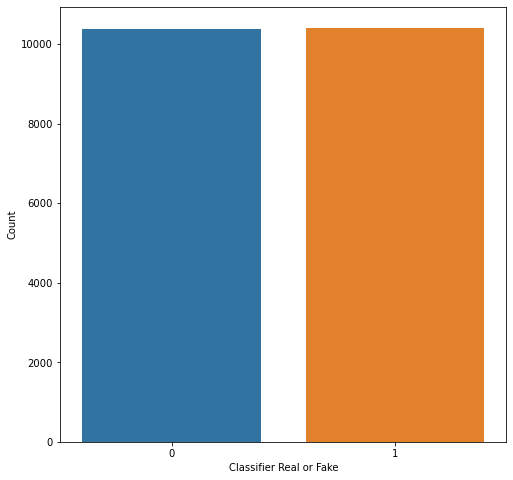

In [30]:
# Visualizing the count of 'Label' column from the dataset
import seaborn as sns
plt.figure(figsize=(8,8))
sns.countplot(x='label', data=x)
plt.xlabel('Classifier Real or Fake')
plt.ylabel('Count')
plt.show()


# Stemming

In [84]:
port_stem = PorterStemmer()

In [85]:
# stemming function
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [86]:
# applying stemming function
news_dataset_train['content'] = news_dataset_train['content'].apply(stemming)

In [87]:
# viewing content after stemming
print(news_dataset_train['content'])

0        hou dem aid even see comey letter jason chaffe...
1        flynn hillari clinton big woman campu breitbar...
2                   truth might get fire consortiumnew com
3        civilian kill singl us airstrik identifi jessi...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci jero...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exerci balkan alex a...
20799                            keep f aliv david swanson
Name: content, Length: 20800, dtype: object


In [94]:
#separating data and label

X = news_dataset_train['content'].values
Y = news_dataset_train['label'].values

In [95]:
# converting textual data to numerical data

vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [96]:
print(X)

  (0, 15553)	0.28485063562728646
  (0, 13348)	0.2565896679337957
  (0, 8822)	0.3635963806326075
  (0, 8546)	0.29212514087043684
  (0, 7612)	0.24785219520671603
  (0, 6930)	0.21874169089359144
  (0, 4917)	0.233316966909351
  (0, 3759)	0.2705332480845492
  (0, 3567)	0.3598939188262559
  (0, 2933)	0.2468450128533713
  (0, 2464)	0.3676519686797209
  (0, 263)	0.27010124977708766
  (1, 16656)	0.3025156488372128
  (1, 6744)	0.19152496072048605
  (1, 5440)	0.7186013955384664
  (1, 3535)	0.2653147533915268
  (1, 2790)	0.19208753385709676
  (1, 2206)	0.36915639258038363
  (1, 1877)	0.15614790568229528
  (1, 1481)	0.2957471154505952
  (2, 15478)	0.41544962664721613
  (2, 9532)	0.49351492943649944
  (2, 5903)	0.3474613386728292
  (2, 5326)	0.3866530551182615
  (2, 3072)	0.46097489583229645
  :	:
  (20797, 12998)	0.2483705036831893
  (20797, 12227)	0.27276402145717243
  (20797, 12022)	0.24790022252744132
  (20797, 10216)	0.0804189541935242
  (20797, 9500)	0.17463635692029988
  (20797, 9431)	0.29394

#  Single word cloud

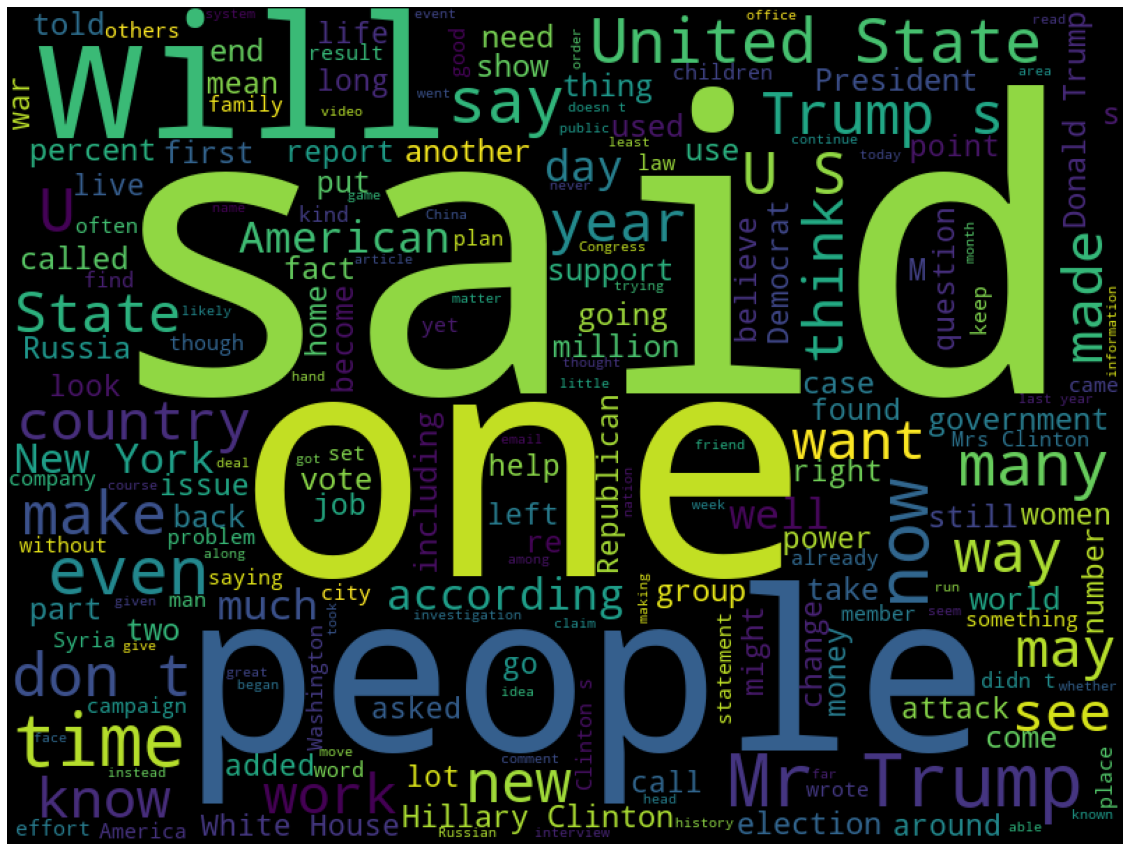

In [91]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# initialize the word cloud
wordcloud = WordCloud( background_color='black', width=800, height=600)
# generate the word cloud by passing the news
text_cloud = wordcloud.generate(' '.join(news_dataset_train['text']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

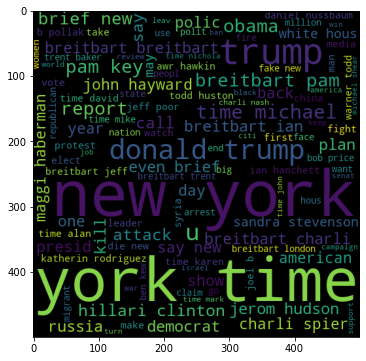

In [42]:
from wordcloud import WordCloud

# make object of wordcloud
wc = WordCloud(background_color='black',min_font_size=10,width=500,height=500)

true_news_wc = wc.generate(news_dataset_train[news_dataset_train['label'] == 0]['content'].str.cat(sep=" "))
plt.figure(figsize=(8,6))
plt.imshow(true_news_wc)
plt.show()


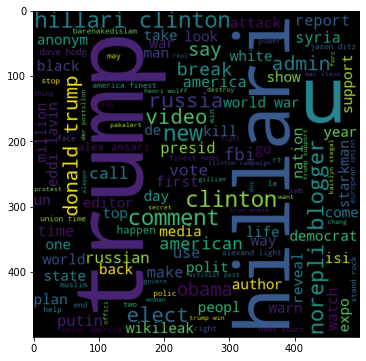

In [43]:
from wordcloud import WordCloud

# make object of wordcloud
wc = WordCloud(background_color='black',min_font_size=10,width=500,height=500)

fake_news_wc = wc.generate(news_dataset_train[news_dataset_train['label'] == 1]['content'].str.cat(sep=" "))
plt.figure(figsize=(8,6))
plt.imshow(fake_news_wc)
plt.show()


# To find a specific count of the words in true and fake news

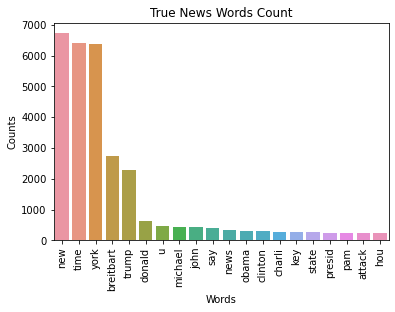

In [97]:
# library for Count Words
from collections import Counter

# create list of True News words
true_news_words_list = (news_dataset_train[news_dataset_train['label'] == 0]['content'].str.cat(sep=" ")).split()

# create DataFrame of that
true_news_words_df = pd.DataFrame(Counter(true_news_words_list).most_common(20))

# Now Let's Plot barplot of this words
sns.barplot(x=true_news_words_df[0],y=true_news_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('True News Words Count')
plt.show()

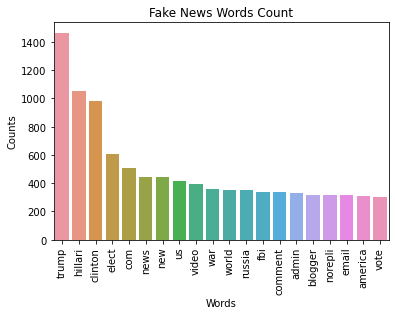

In [98]:
# create list of Fake News words
fake_news_words_list = (news_dataset_train[news_dataset_train['label'] == 1]['content'].str.cat(sep=" ")).split()

# create DataFrame of that
fake_news_words_df = pd.DataFrame(Counter(fake_news_words_list).most_common(20))

# Now Let's Plot barplot of this words
sns.barplot(x=fake_news_words_df[0],y=fake_news_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Fake News Words Count')
plt.show()

# Data spliting to test and train

In [99]:
# splitting data to training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [103]:
X_train.shape

(16640, 16984)

In [104]:
X_test.shape

(4160, 16984)

In [106]:
Y_train.shape

(16640,)

In [107]:
Y_test.shape

(4160,)

# Model training using Logistic regression


In [108]:
model = LogisticRegression()

In [109]:
model.fit(X_train, Y_train)

LogisticRegression()

In [115]:
# accuracy score on training data
prediction = model.predict(X_train)
accuracy_training_data = accuracy_score(prediction, Y_train)
print(f"Accuracy score for training data: {accuracy_training_data}")

Accuracy score for training data: 0.9866586538461538


In [111]:
# accuracy score on test data
prediction = model.predict(X_test)
accuracy_test_data = accuracy_score(X_test_predictions, Y_test)
print(f"Accuracy score for test data: {accuracy_test_data}")

Accuracy score for test data: 0.9790865384615385


# To build a predictive system for logistic regression

In [116]:
# Build a Simple Predictive System

'''
index = int(input("Enter article number to be verified: "))
^ To get article number as input from user
'''

X_new = X_test[1]
new_predict = model.predict(X_new)
if(new_predict[0]==0):
    print("The News is real")
else:
    print("The News is fake")

The News is fake


In [117]:
print(Y_test[1])

0


# Classification report for logistic regression

In [114]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, X_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



In [56]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization


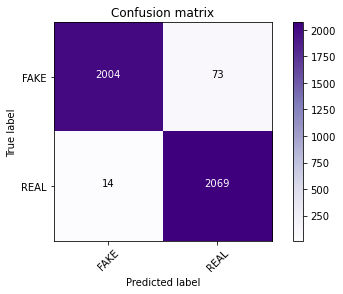

In [59]:
cm1 = metrics.confusion_matrix(Y_test,X_test_predictions )
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])

# Classification Model: Multinomial Naive Bayes

In [61]:
#let's implement the model : Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [62]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [63]:
X1_train

<13936x17128 sparse matrix of type '<class 'numpy.float64'>'
	with 141331 stored elements in Compressed Sparse Row format>

In [64]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


accuracy:   0.950
Confusion matrix, without normalization


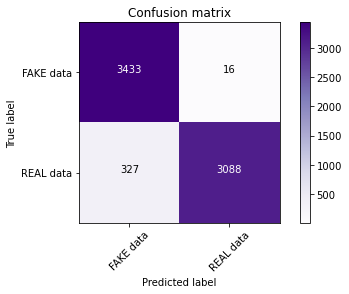

In [65]:
from sklearn import metrics
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

classifier.fit(X1_train, Y1_train)
prediction1 = classifier.predict(X1_test)
score = metrics.accuracy_score(Y1_test, prediction1)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y1_test, prediction1)
plot_confusion_matrix(cm1, classes=['FAKE data', 'REAL data'])

# Predictive system for Multinomial Naive Bayes

In [66]:
X1_new = X1_test[600]

prediction = model.predict(X1_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [67]:
print(Y_test[100])

0


# Classification report for Multinomial Naive Bayes

In [68]:
from sklearn.metrics import classification_report
print(classification_report(Y1_test,prediction1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3449
           1       0.99      0.90      0.95      3415

    accuracy                           0.95      6864
   macro avg       0.95      0.95      0.95      6864
weighted avg       0.95      0.95      0.95      6864



# Passive Agressive classifier

In [69]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.33, random_state=42)

accuracy:   0.989
Confusion matrix, without normalization


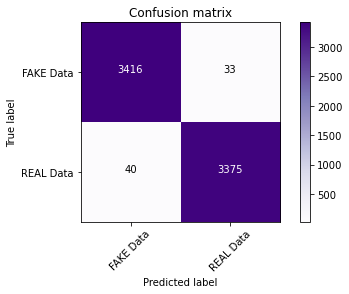

In [70]:
#lets implemet the algorithm : Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

linear_clf.fit(X2_train, Y2_train)
prediction2 = linear_clf.predict(X2_test)
score = metrics.accuracy_score(Y2_test, prediction2)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y2_test, prediction2)
plot_confusion_matrix(cm2, classes=['FAKE Data', 'REAL Data'])

# predictive system for passive agressive classifier

In [71]:
X2_new = X2_test[1000]

prediction = model.predict(X2_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [72]:
print(Y2_test[100])

1


# Classification report for Passive agressive classifier

In [73]:
from sklearn.metrics import classification_report
print(classification_report(Y2_test,prediction2))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3449
           1       0.99      0.99      0.99      3415

    accuracy                           0.99      6864
   macro avg       0.99      0.99      0.99      6864
weighted avg       0.99      0.99      0.99      6864



# Random forest classifier


In [74]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X, Y, test_size=0.33, random_state=42, stratify=Y)

In [75]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=100,
                                 random_state=1,
                                 n_jobs=2)

In [76]:
# Fit the model
forest.fit(X3_train, Y3_train)

RandomForestClassifier(n_jobs=2, random_state=1)

In [77]:
# Measure model performance
Y_pred = forest.predict(X3_test)
print('Accuracy: %.3f' % accuracy_score(Y3_test, Y_pred))

Accuracy: 0.991


accuracy:   0.991
Confusion matrix, without normalization


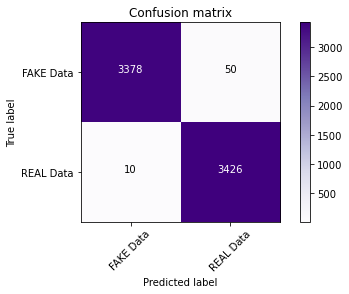

In [78]:
#CONFUSION MATRIX
score = metrics.accuracy_score(Y3_test, Y_pred)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y3_test, Y_pred)
plot_confusion_matrix(cm2, classes=['FAKE Data', 'REAL Data'])

# predictive system for random forest classifier¶

In [79]:
X3_new = X3_test[100]

prediction = model.predict(X3_new)
print(prediction)

if (prediction[0]==0):
  print('The news is REAL')
else:
  print('The news is Fake')

[1]
The news is Fake


In [80]:
print(Y[100])

1


# Classification report for Random Forest Classifier

In [118]:
from sklearn.metrics import classification_report

print(classification_report(Y3_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3428
           1       0.99      1.00      0.99      3436

    accuracy                           0.99      6864
   macro avg       0.99      0.99      0.99      6864
weighted avg       0.99      0.99      0.99      6864

